In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

Deep Learning Model

In [2]:

mat_contents = sio.loadmat('WLDataCW.mat')

data = mat_contents['data']
print("data shape: ", data.shape)

label = mat_contents['label']
print("label shape: ", label.shape)

kf = KFold(n_splits=5, shuffle=True)
fold_scores = []
accuracies = []
histories = []
accuracy_histories = []
loss_histories = []

label = label.T
data = data.transpose(2,1,0)


data shape:  (62, 512, 360)
label shape:  (1, 360)


Fold 1:


c:\Users\sekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 599ms/step - accuracy: 0.6583 - loss: 0.7667 - val_accuracy: 0.6806 - val_loss: 2.6950
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 395ms/step - accuracy: 0.8753 - loss: 0.3464 - val_accuracy: 0.7917 - val_loss: 0.6495
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 415ms/step - accuracy: 0.9692 - loss: 0.1239 - val_accuracy: 0.7500 - val_loss: 0.6380
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 410ms/step - accuracy: 0.9770 - loss: 0.0753 - val_accuracy: 0.6667 - val_loss: 0.8183
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 393ms/step - accuracy: 0.9862 - loss: 0.0486 - val_accuracy: 0.8194 - val_loss: 0.4735
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8550 - loss: 0.4043
Fold 2:
Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 466ms/step - accuracy: 0.8036 - loss: 0.4802 - val_accuracy: 0.7361 - val_loss: 2.2193
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 444ms/step - accuracy: 0.9280 - loss: 0.1794 - val_accuracy: 0.6806 - val_loss: 1.4119
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/s

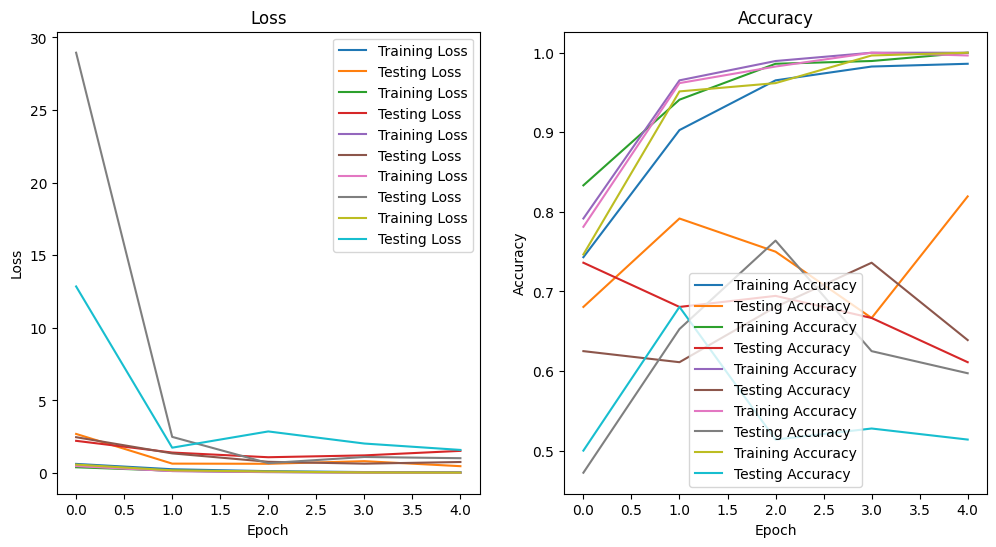

In [3]:
def custom_nn():
    model = keras.Sequential([
        keras.layers.Conv2D(6, kernel_size=5, input_shape=(512, 62, 1)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        keras.layers.Conv2D(16, kernel_size=5),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPooling2D(pool_size=2),

        keras.layers.Flatten(),

        keras.layers.Dense(1200),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),

        keras.layers.Dense(128),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),

        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model




for fold, (train_index, test_index) in enumerate(kf.split(data), 1):
    print(f"Fold {fold}:")
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]
    model = custom_nn()
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
    test_loss, test_acc = model.evaluate(X_test, y_test)
    accuracies.append(test_acc)
    histories.append(history.history)

average_accuracy_cnn = np.mean(accuracies)
print()
print("Average Accuracy of CNN model:", round(average_accuracy_cnn, 2))

plt.figure(figsize=(12, 6))

# Plotting loss
plt.subplot(1, 2, 1)
for history in histories:
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Testing Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
for history in histories:
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Testing Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




Logistic Regression Model

In [4]:
mat_contents = sio.loadmat('WLDataCW.mat')
data = mat_contents['data']
label = mat_contents['label']

data = np.reshape(data, (data.shape[0] * data.shape[1], data.shape[2]))
reverse_label = np.flip(np.copy(label), axis=1)
label = np.concatenate((reverse_label, label), axis=0)

print("label shape: ",  label.shape)
print("data shape: ",  data.shape)

label shape:  (2, 360)
data shape:  (31744, 360)


Fold 1/5


C:\Users\sekar\AppData\Local\Temp\ipykernel_1960\3338813856.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 19 Loss: 0.00007
Validation Accuracy: 0.5417
Fold 2/5
Epoch: 21 Loss: 0.00009
Validation Accuracy: 0.4444
Fold 3/5
Epoch: 20 Loss: 0.00006
Validation Accuracy: 0.4722
Fold 4/5
Epoch: 23 Loss: 0.00002
Validation Accuracy: 0.5694
Fold 5/5
Epoch: 18 Loss: 0.00005
Validation Accuracy: 0.5139
Average Accuracy for logistic regression: 0.5083


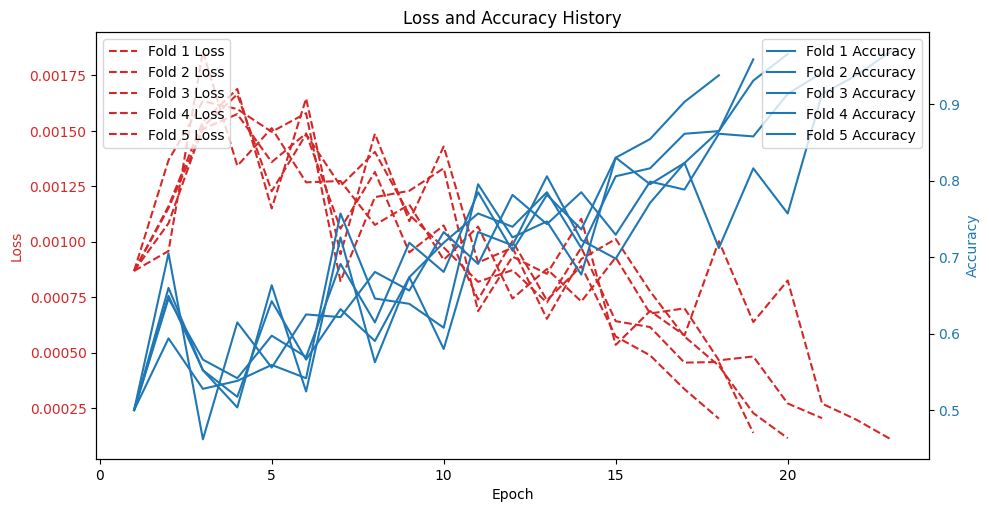

In [5]:

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define accuracy calculation function
def calculate_accuracy(Y_pred, Y_true):
    return np.mean(Y_pred == Y_true)

# Define logistic regression function
def logistic_regression(X_train, Y_train, learning_rate=0.001, max_iter=3000, loss_tol=0.0001):
    loss_history = []
    accuracy_history = []

    n_features, n_samples = X_train.shape
    n_classes = Y_train.shape[1]

    # Initialize weights and bias
    W = np.zeros((n_features, Y_train.shape[0]))
    b = np.zeros((1, n_classes))

    for i in range(max_iter):
        # Forward pass
        z = np.dot(W.T, X_train) + b
        Y_hat = sigmoid(z)

        # Loss calculation (binary cross entropy error)
        loss = (1/n_classes) * (np.mean((Y_hat - Y_train) ** 2))

        # Backward pass
        dW = np.dot(X_train, (Y_hat - Y_train).T) / n_samples
        db = np.sum(Y_hat - Y_train) / n_samples

        # Update weights and bias
        W = W - learning_rate * dW
        b = b - learning_rate * db

        # Check for convergence
        if loss < loss_tol:
            print(f"Epoch: {i} Loss: {loss:.5f}")
            break

        loss_history.append(loss)
        Y_pred = np.round(Y_hat)
        accuracy = calculate_accuracy(Y_pred, Y_train)
        accuracy_history.append(accuracy)

    return W, b, loss_history, accuracy_history


X = data
Y = label

# Define k-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True)

# Lists to store accuracy and loss history for each fold
fold_accuracy_history = []
fold_loss_history = []
accuracies = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X.T)):
    print(f"Fold {fold + 1}/{k_folds}")

    # Prepare data for this fold
    X_train, X_val = X[:, train_index], X[:, val_index]
    Y_train, Y_val = Y[:, train_index], Y[:, val_index]


    new_W = np.zeros((X_train.shape[0], Y_train.shape[0]))
    new_b = np.zeros((Y_train.shape[0], Y_train.shape[1]))

    # Apply logistic regression
    new_W, new_b, loss_history, accuracy_history = logistic_regression(X_train, Y_train)
    new_b = np.full((Y_val.shape[0], Y_val.shape[1]), 0)

    # Calculate accuracy on validation set
    z_val = np.dot(new_W.T, X_val) + new_b
    Y_hat_val = sigmoid(z_val)
    Y_pred_val = np.round(Y_hat_val)
    accuracy_val = calculate_accuracy(Y_pred_val, Y_val)
    print(f"Validation Accuracy: {accuracy_val:.4f}")
    accuracies.append(round(accuracy_val, 4))

    # Store accuracy and loss history for this fold
    fold_accuracy_history.append(accuracy_history)
    fold_loss_history.append(loss_history)

# Calculate average accuracy across all folds
average_accuracy_log = np.mean(accuracies)
print(f"Average Accuracy for logistic regression: {average_accuracy_log:.4f}")



# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting loss
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
for fold, loss_hist in enumerate(fold_loss_history):
    ax1.plot(range(1, len(loss_hist) + 1), loss_hist, color=color, linestyle='--', label=f'Fold {fold+1} Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Creating a second y-axis for accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
for fold, acc_hist in enumerate(fold_accuracy_history):
    ax2.plot(range(1, len(acc_hist) + 1), acc_hist, color=color, label=f'Fold {fold+1} Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Loss and Accuracy History')
plt.show()



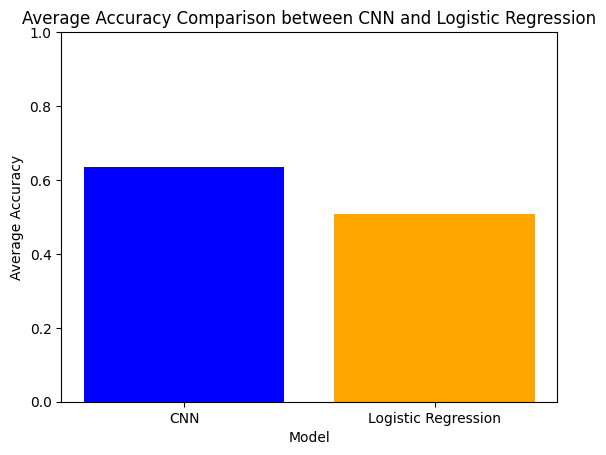

In [6]:
# Plot graph comparing accuracies for each model
models = ['CNN', 'Logistic Regression']
accuracies = [average_accuracy_cnn, average_accuracy_log]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy Comparison between CNN and Logistic Regression')
plt.ylim(0, 1)  # Limit y-axis to range [0, 1]
plt.show()